In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
sns.set_context('poster')
sns.set_palette('colorblind')

random_seed = 2021

### Problem sheet

This time, you're going to build the model yourself! I've generated some new data with some new truth values, and its your turn to set up the model, and present the results in a way that you understand. Make sure you go through the `pymc3_example` notebook first, and check out `pymc3_answers` if you get lost. 

Note: the final plot from the previous notebook won't work the same way because this function isn't linear.

### First, let's simulate the data we're going to fit!

In [2]:
A_true = 10
phi_true = .5
c_true = 20

x = np.linspace(0, 10, 100)
y = A_true * np.sin(x + phi_true) + c_true
yerr = 6.

np.random.seed(random_seed)
y += np.random.randn(len(y))*yerr

Text(0, 0.5, 'y')

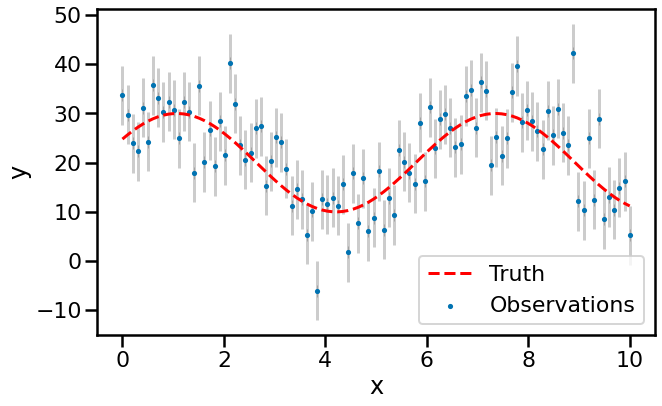

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, zorder=1, s=10, label='Observations')
ax.errorbar(x, y, yerr=yerr, alpha=.2, c='k', zorder=0, fmt='|')
ax.plot(x, A_true * np.sin(x + phi_true) + c_true, ls='--', c='r', lw=3, label='Truth')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

Now, let's set up a PyMC3 script to model this line! We want to measure the parameters $m$ and $c$ that determine the slope and intercept of the line.

In [4]:
model = pm.Model()

with model:
    # Define the parameters and give them priors
    phi = pm.HalfNormal('phi', sigma = 10, testval = 1)
    A = pm.Normal('A', mu = 10, sigma = 5, testval=10)
    c = pm.Normal('c', mu = 20, sigma = 10, testval = 20)
    
    likelihood = pm.Normal('ll', mu = A * np.sin(x + phi) + c, sigma = yerr, observed = y)

In [5]:
with model:
    trace = pm.sample(random_seed = random_seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c, A, phi]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


And our model has sampled! PyMC3 has some built in methods you can use to evaluate your fit.

In [6]:
print(pm.summary(trace))

/Users/Anaconda/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  ess_sd  \
A    10.357  0.893   8.717   12.003      0.014    0.010    4000.0  3944.0   
c    20.643  0.636  19.429   21.812      0.010    0.007    4124.0  4109.0   
phi   0.417  0.083   0.255    0.567      0.001    0.001    3545.0  3545.0   

     ess_bulk  ess_tail  r_hat  
A      4008.0    2620.0    1.0  
c      4119.0    2861.0    1.0  
phi    3536.0    2545.0    1.0  


This summary shows that the `r_hat` parameter is equal or close to 1, which indicates a good fit.

/Users/Anaconda/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


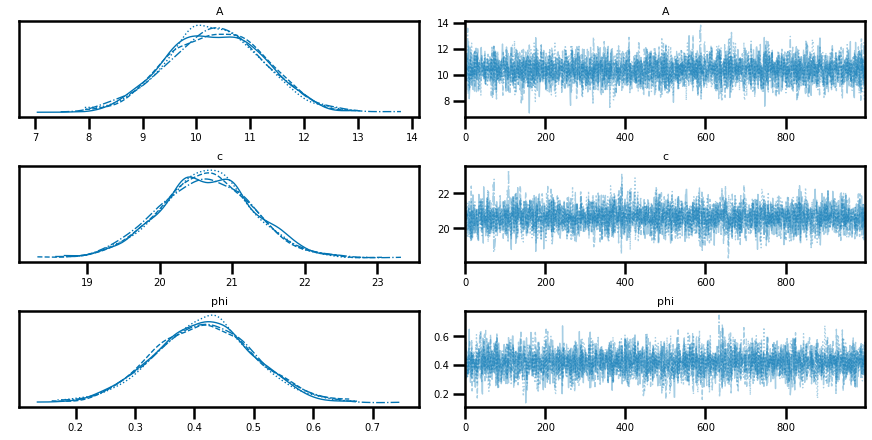

In [7]:
pm.traceplot(trace);

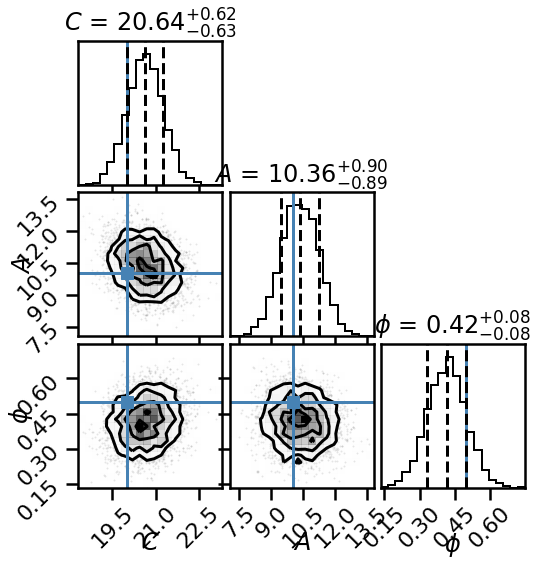

In [12]:
import corner

chain = np.array([trace['c'], trace['A'], trace['phi']])
corner.corner(chain.T, labels=[r'$C$',r'$A$', r'$\phi$'], show_titles=True, 
              quantiles=[0.16, 0.5, 0.84], truths=[c_true, A_true, phi_true])
plt.show()